In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common.scatter_plotter import ScatterPlotter
from common.heatmap import heatmap_values

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [2]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii             2006   
1                              Super Mario Bros.      NES             1985   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2             2006   
10448                                    Deus Ex       PC             2000   
10449                  Monster Rancher Advance 2      GBA             2002   
10450                              Karnaaj Rally      GBA             2003   
10451                Wade Hixton's Counter Punch      GBA             2004   

              Genre  NA_Sales  EU_Sales  JP_Sales  Global_Sales

### Charts

Stats grouped by year of release

<AxesSubplot:xlabel='Year_of_Release'>

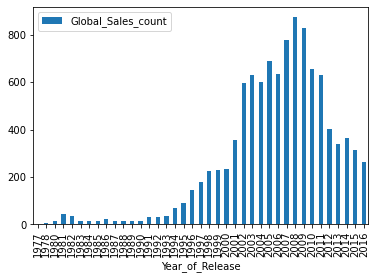

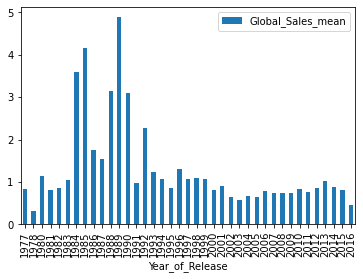

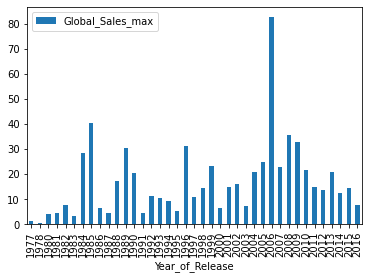

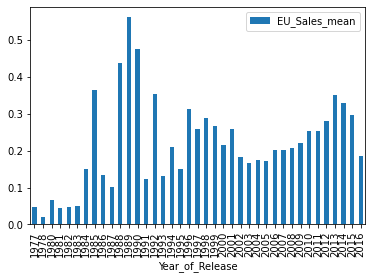

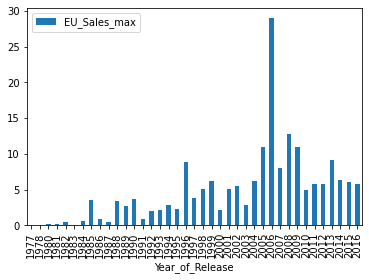

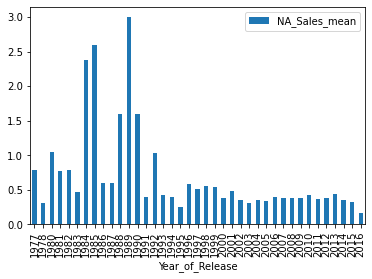

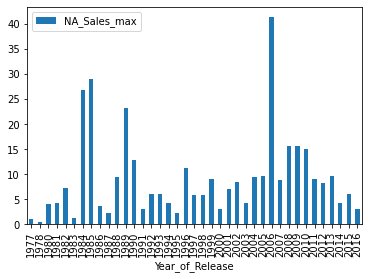

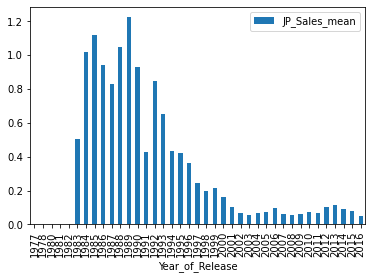

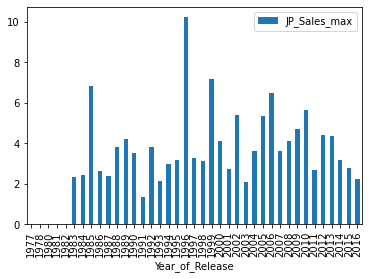

In [3]:
number_of_entries_by_years = data\
    .filter(["Year_of_Release", "Global_Sales", "EU_Sales", "NA_Sales", "JP_Sales"])\
    .groupby("Year_of_Release").agg(["mean", "count", "max"])
number_of_entries_by_years.columns = ['_'.join(col).strip()
                                      for col in number_of_entries_by_years.columns.values]

number_of_entries_by_years.plot.bar(y="Global_Sales_count")
number_of_entries_by_years.plot.bar(y="Global_Sales_mean")
number_of_entries_by_years.plot.bar(y="Global_Sales_max")

number_of_entries_by_years.plot.bar(y="EU_Sales_mean")
number_of_entries_by_years.plot.bar(y="EU_Sales_max")

number_of_entries_by_years.plot.bar(y="NA_Sales_mean")
number_of_entries_by_years.plot.bar(y="NA_Sales_max")

number_of_entries_by_years.plot.bar(y="JP_Sales_mean")
number_of_entries_by_years.plot.bar(y="JP_Sales_max")

Stats grouped by year of release and game title

<AxesSubplot:xlabel='Year_of_Release'>

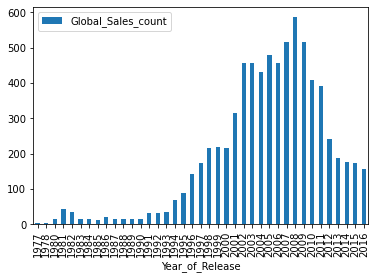

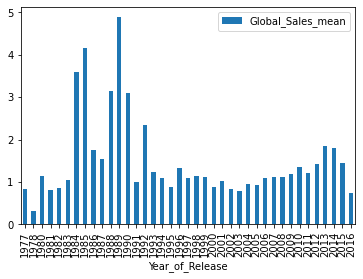

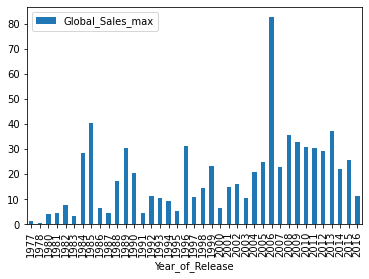

In [4]:
number_of_entries_by_years_and_titles = data.groupby(["Year_of_Release", "Name"]).sum()
number_of_entries_by_years_and_titles = number_of_entries_by_years_and_titles\
    .filter(["Year_of_Release", "Global_Sales"])\
    .groupby("Year_of_Release").agg(["mean", "count", "max"])
number_of_entries_by_years_and_titles.columns = ['_'.join(col).strip()
                                      for col in number_of_entries_by_years_and_titles.columns.values]

number_of_entries_by_years_and_titles.plot.bar(y="Global_Sales_count")
number_of_entries_by_years_and_titles.plot.bar(y="Global_Sales_mean")
number_of_entries_by_years_and_titles.plot.bar(y="Global_Sales_max")

Critic Score to User Score

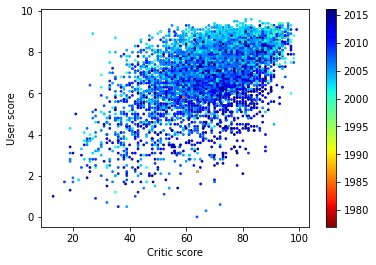

In [5]:
category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.User_Score, data[category_column])\
    .with_labels('Critic score', 'User score')\
    .with_color_bar()\
    .plot()

Sales per region considering Critic Score

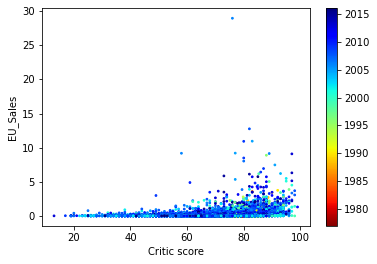

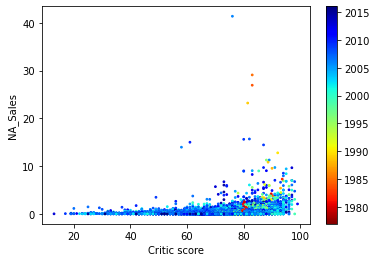

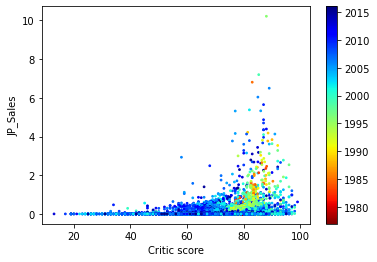

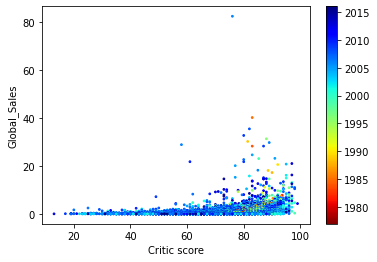

In [6]:
category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.EU_Sales, data[category_column])\
    .with_labels('Critic score', 'EU_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.NA_Sales, data[category_column])\
    .with_labels('Critic score', 'NA_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.JP_Sales, data[category_column])\
    .with_labels('Critic score', 'JP_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.Critic_Score, data.Global_Sales, data[category_column])\
    .with_labels('Critic score', 'Global_Sales')\
    .with_color_bar()\
    .plot()

Sales per region considering User Score

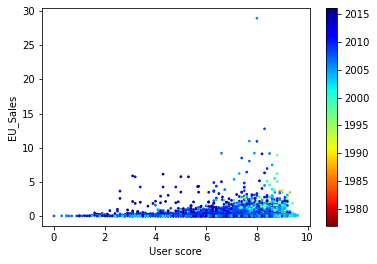

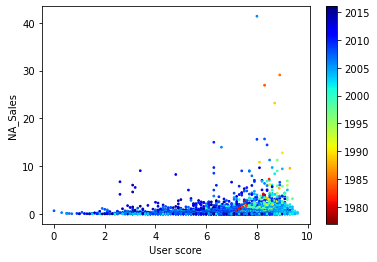

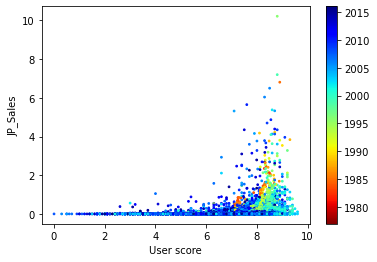

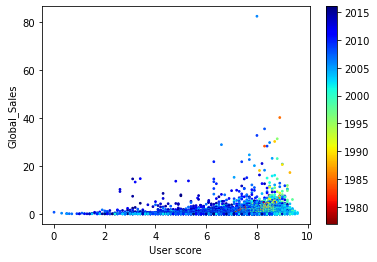

In [7]:
category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.EU_Sales, data[category_column])\
    .with_labels('User score', 'EU_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.NA_Sales, data[category_column])\
    .with_labels('User score', 'NA_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.JP_Sales, data[category_column])\
    .with_labels('User score', 'JP_Sales')\
    .with_color_bar()\
    .plot()

category_column = "Year_of_Release"
ScatterPlotter(data.User_Score, data.Global_Sales, data[category_column])\
    .with_labels('User score', 'Global_Sales')\
    .with_color_bar()\
    .plot()


Correlation matrix between numerical values in the dataset

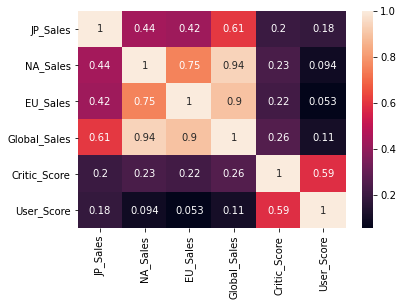

In [8]:
sns.heatmap(data[["JP_Sales", "NA_Sales", "EU_Sales", "Global_Sales", "Critic_Score", "User_Score"]].corr(), annot=True)
plt.show()

Heatmap x - Genre, y - Platform, heat - sales

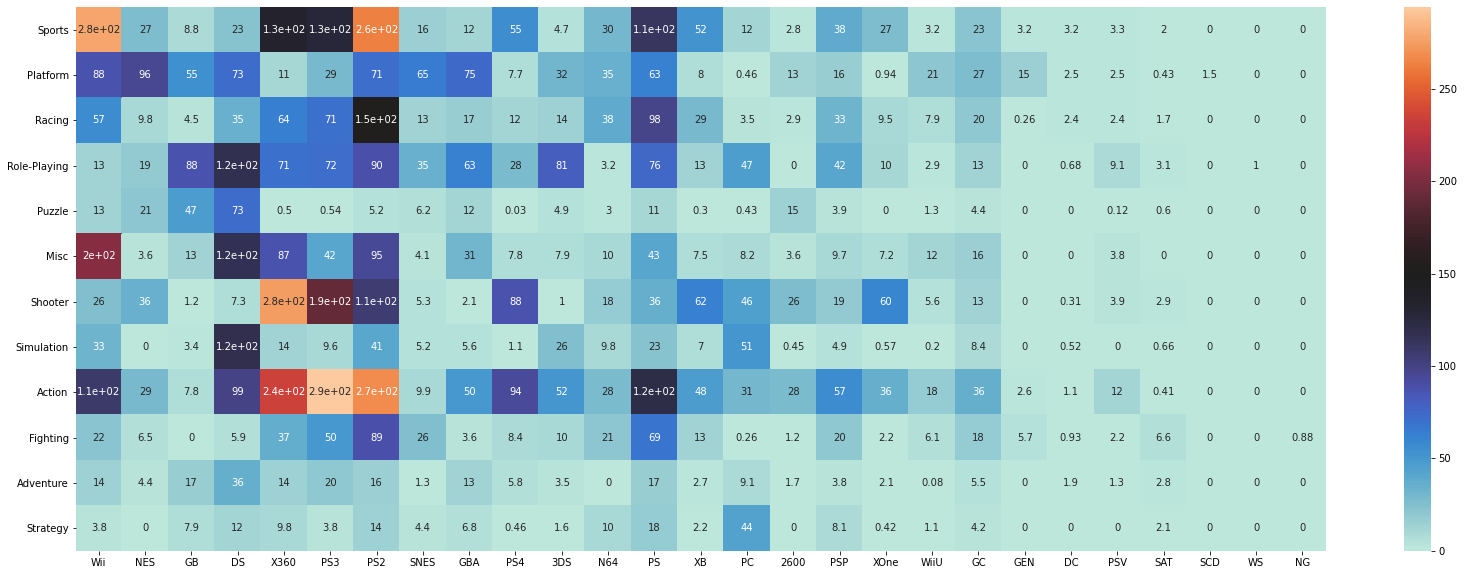

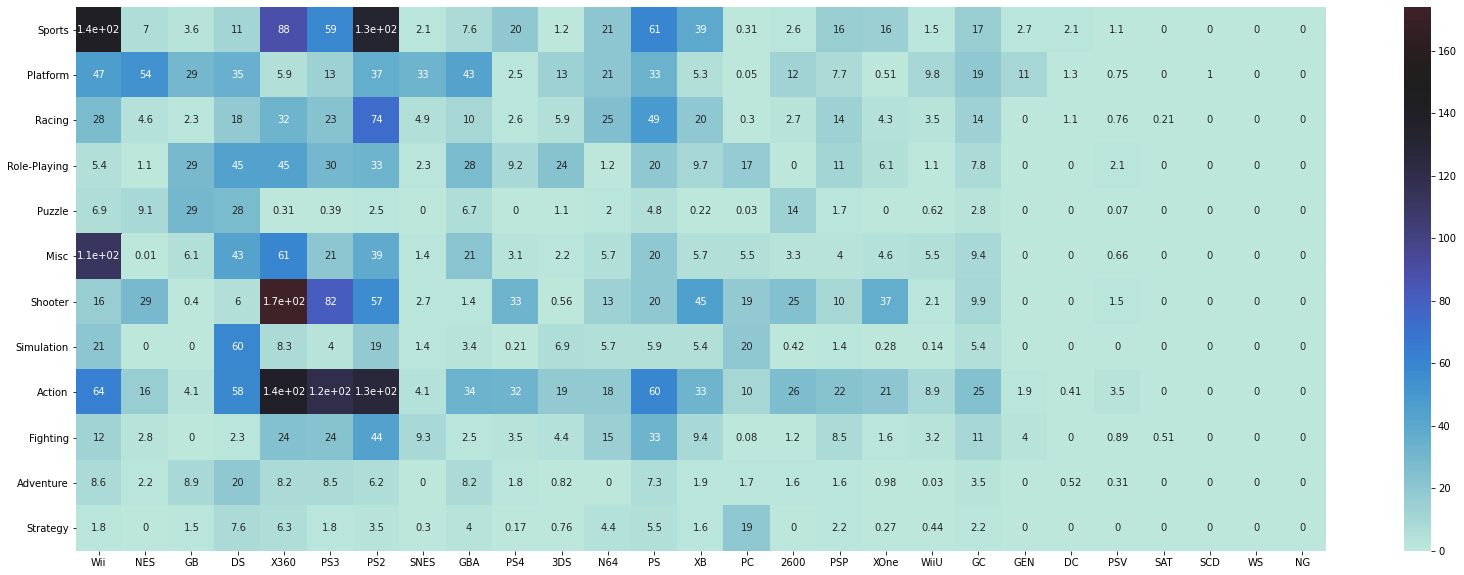

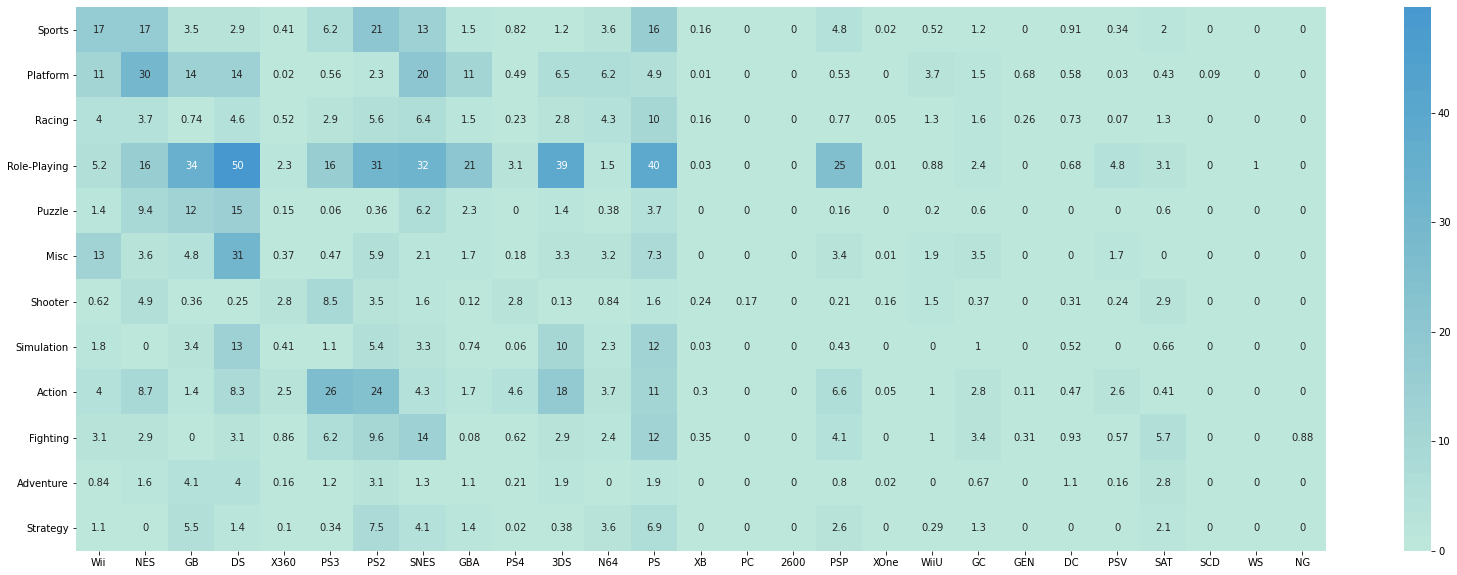

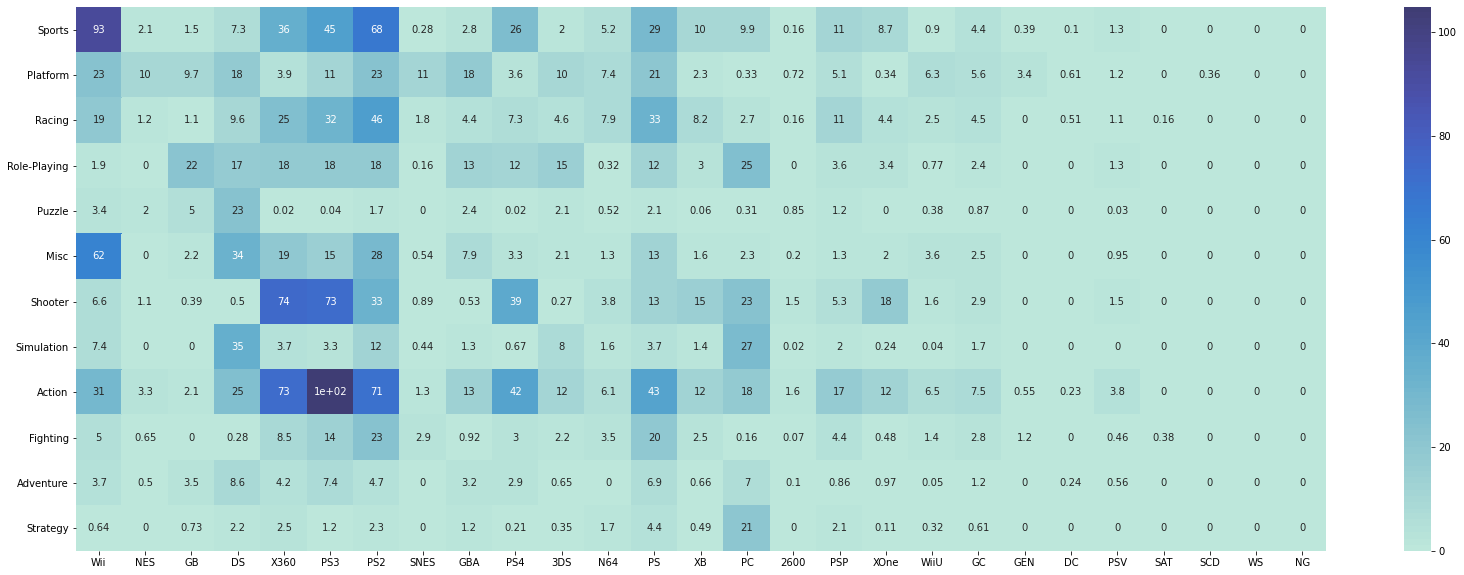

In [9]:
plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "Global_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "NA_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "JP_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "EU_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "Global_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "NA_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "JP_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "EU_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

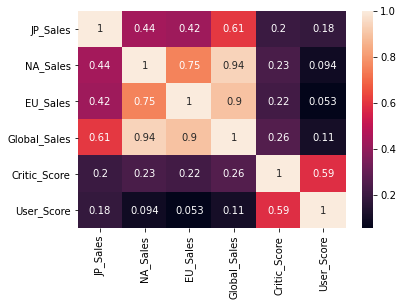

In [10]:
sns.heatmap(data[["JP_Sales", "NA_Sales", "EU_Sales", "Global_Sales", "Critic_Score", "User_Score"]].corr(), annot=True)
plt.show()

Heatmap x - Genre, y - Platform, heat - sales

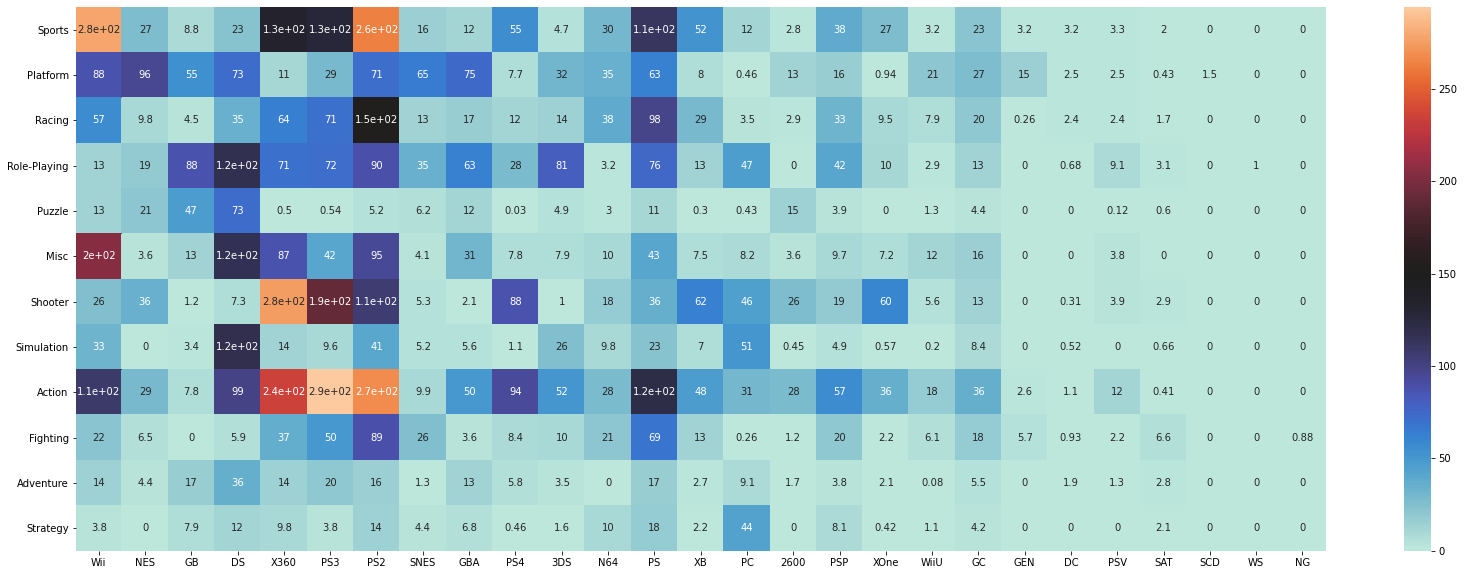

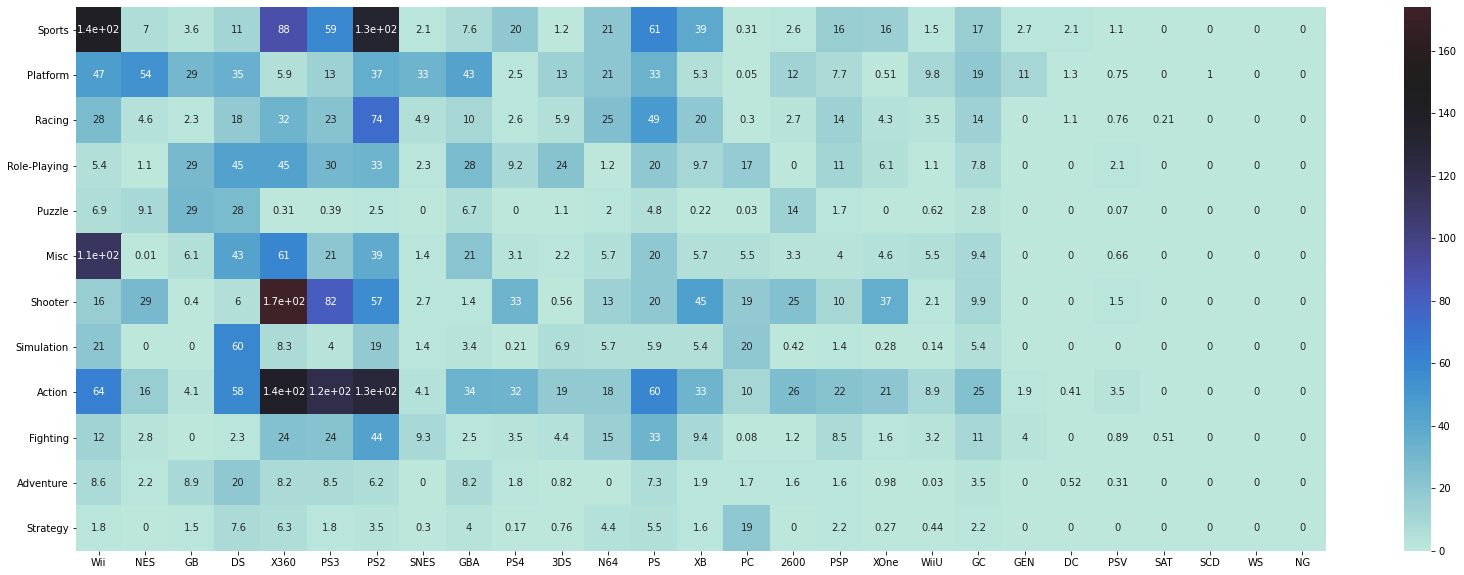

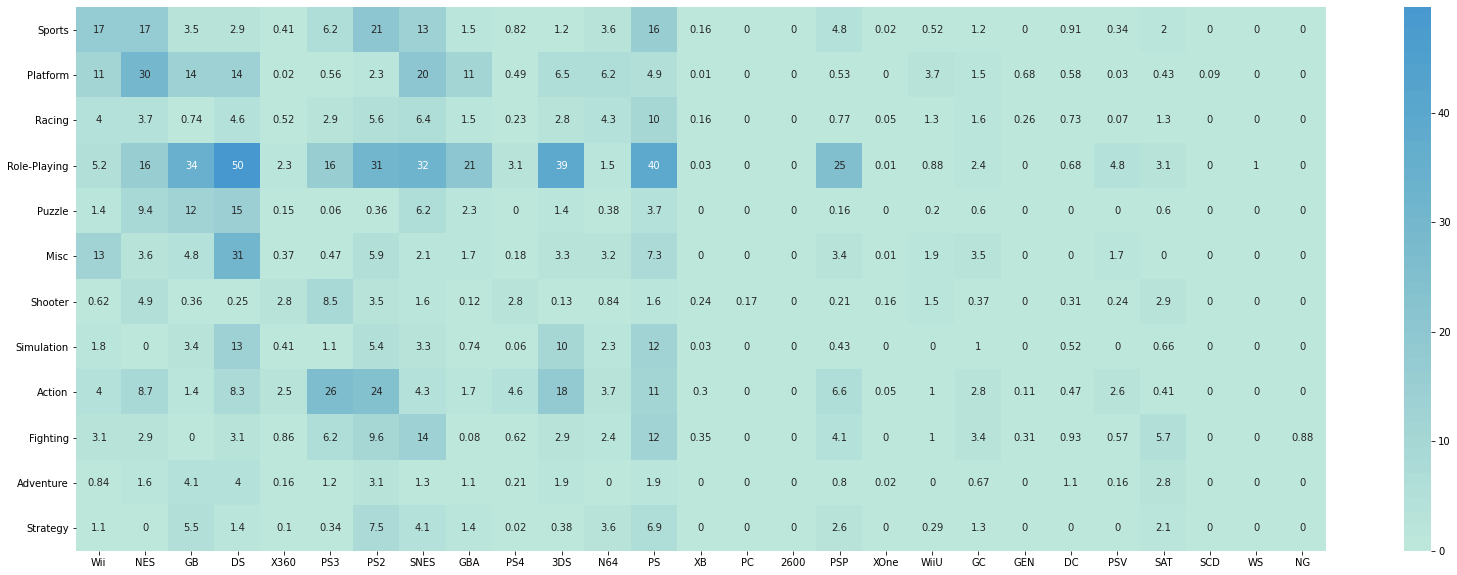

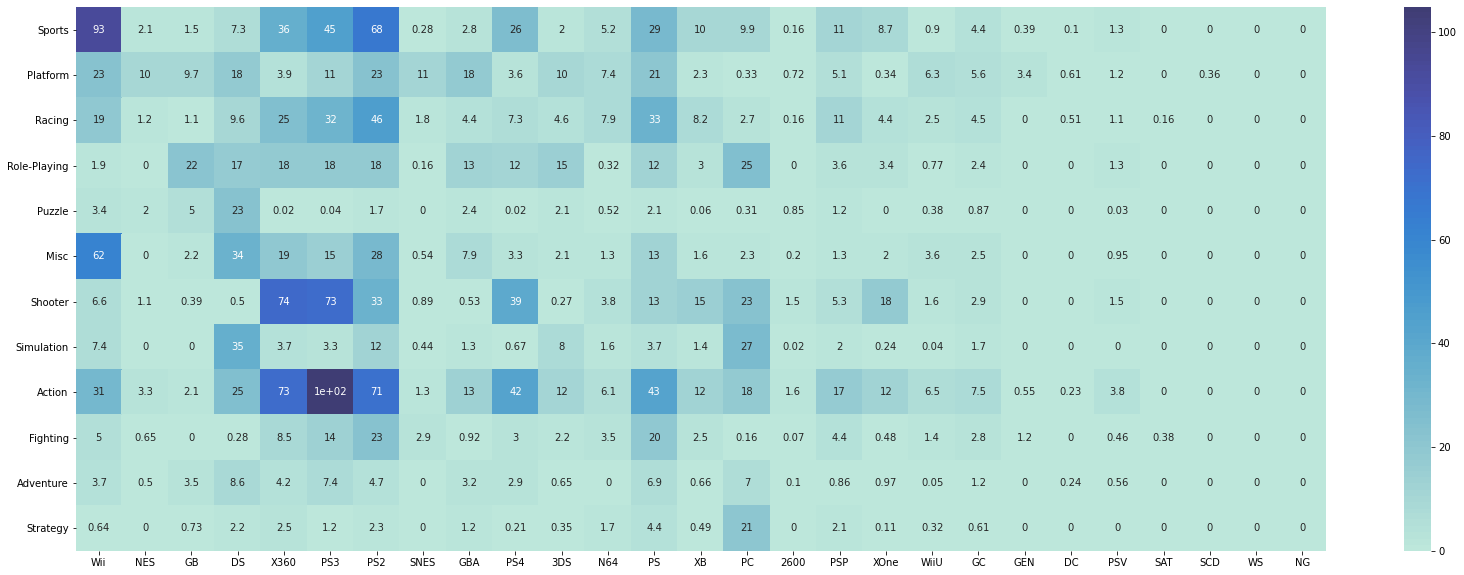

In [11]:
plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "Global_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "NA_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "JP_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()

plt.figure(figsize=(28, 10))
results, rows, columns = heatmap_values(data, "EU_Sales", "Genre", "Platform")
sns.heatmap(results, xticklabels=columns, yticklabels=rows, annot=True, center=150)
plt.show()